In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
# np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("data/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
abalone_features = data
abalone_labels = abalone_features.pop('Rings')

In [4]:
abalone_features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [5]:
abalone_labels

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [6]:
abalone_labels.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Classificazione età

In [7]:
from tensorflow.keras.utils import to_categorical
abalone_cat_labels = to_categorical(abalone_labels)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(abalone_features, abalone_cat_labels, test_size=1/3, random_state=42)

In [9]:
# from tensorflow import feature_column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# variabili numeriche
numeric_vars = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]
# varibili categoriche
categorical_vars = ["Sex"]

# feature_columns = []
# for header in numeric_vars:
#     feature_columns.append(tf.feature_column.numeric_column(header))

# sex_type = feature_column.categorical_column_with_vocabulary_list('Sex', ['M', 'F', 'I'])
# sex_type_one_hot = feature_column.indicator_column(sex_type)
# feature_columns.append(sex_type_one_hot)


preprocessor = ColumnTransformer([
    ( "categorical", OneHotEncoder()    , categorical_vars),
    ( "numeric"    , StandardScaler()   , numeric_vars),
])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [10]:
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.36501294,  0.40649702,
        0.22925817,  0.2570285 ,  0.7458663 ,  0.05913851, -0.23191583])

In [11]:
X_train.shape[1],  y_train[0].shape[0]

(10, 30)

In [12]:
model = tf.keras.Sequential([
    layers.Dense(10, activation="relu", input_dim=X_train.shape[1]),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(y_train[0].shape[0], activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 30)                510       
                                                                 
Total params: 1,500
Trainable params: 1,500
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [15]:
fit_history = model.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
279/279 [==============================] - 1s 1ms/step - loss: 2.7512 - accuracy: 0.1606
Epoch 2/20
279/279 [==============================] - 0s 1ms/step - loss: 2.2199 - accuracy: 0.2338
Epoch 3/20
279/279 [==============================] - 0s 1ms/step - loss: 2.0826 - accuracy: 0.2356
Epoch 4/20
279/279 [==============================] - 0s 1ms/step - loss: 2.0212 - accuracy: 0.2593
Epoch 5/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9910 - accuracy: 0.2540
Epoch 6/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9724 - accuracy: 0.2593
Epoch 7/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9573 - accuracy: 0.2658
Epoch 8/20
279/279 [==============================] - 0s 2ms/step - loss: 1.9465 - accuracy: 0.2611
Epoch 9/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9359 - accuracy: 0.2672
Epoch 10/20
279/279 [==============================] - 0s 1ms/step - loss: 1.9295 - accuracy: 0.2712

In [16]:
model.evaluate(X_val, y_val)

44/44 [==============================] - 0s 1ms/step - loss: 1.9368 - accuracy: 0.3080


[1.9368197917938232, 0.307968407869339]

In [18]:
model.predict(X_val[:2])

1/1 [==============================] - 0s 21ms/step


array([[7.4521013e-06, 2.3031503e-06, 1.4108781e-06, 8.5581104e-07,
        4.0884261e-06, 5.3827389e-05, 1.2567630e-03, 5.2087503e-03,
        4.1971732e-02, 1.0174385e-01, 1.7453045e-01, 1.2779187e-01,
        1.1693375e-01, 1.3177828e-01, 8.7623931e-02, 6.4914495e-02,
        3.7624292e-02, 3.5628170e-02, 2.3506034e-02, 2.4521483e-02,
        1.1143625e-02, 7.2292374e-03, 1.2711063e-03, 3.5246580e-03,
        1.2465035e-04, 1.1831680e-04, 9.4046211e-04, 6.4989683e-05,
        5.1357624e-06, 4.7403510e-04],
       [2.9161038e-07, 5.8936951e-08, 1.4296789e-08, 4.4834945e-08,
        7.6314137e-07, 8.0756763e-05, 3.0410306e-03, 2.1267340e-02,
        1.8479773e-01, 3.5568053e-01, 2.4637018e-01, 9.3238533e-02,
        4.7751304e-02, 2.1074610e-02, 1.1423248e-02, 8.9419931e-03,
        1.9540696e-03, 1.4717716e-03, 1.3812798e-03, 1.0907998e-03,
        1.6671688e-04, 1.7672135e-04, 2.9887685e-06, 6.1758248e-05,
        3.8167038e-08, 9.1876792e-08, 1.8231814e-05, 1.6942369e-08,
        1

In [19]:
np.argmax(model.predict(X_val[:5]), -1)

1/1 [==============================] - 0s 23ms/step


array([10,  9, 13, 10, 10], dtype=int64)

In [20]:
np.argmax(y_val[:5], -1)

array([ 9,  8, 16,  9, 14], dtype=int64)

# Classificazione quartili

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

abalone_q_labels = pd.qcut(abalone_labels, 4)
print(abalone_q_labels)
encoder = LabelEncoder()
encoder.fit(abalone_q_labels)
encoded_Y = encoder.transform(abalone_q_labels)
# convert integers to dummy variables (i.e. one hot encoded)
abalone_q_onehot_labels = to_categorical(encoded_Y)
print("\nOne hot encoding:\n", abalone_q_onehot_labels)

0       (11.0, 29.0]
1       (0.999, 8.0]
2         (8.0, 9.0]
3        (9.0, 11.0]
4       (0.999, 8.0]
            ...     
4172     (9.0, 11.0]
4173     (9.0, 11.0]
4174      (8.0, 9.0]
4175     (9.0, 11.0]
4176    (11.0, 29.0]
Name: Rings, Length: 4177, dtype: category
Categories (4, interval[float64, right]): [(0.999, 8.0] < (8.0, 9.0] < (9.0, 11.0] < (11.0, 29.0]]

One hot encoding:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [28]:
Xq_train, Xq_val, yq_train, yq_val = train_test_split(abalone_features, abalone_q_onehot_labels, test_size=1/3, random_state=42)

In [29]:
preprocessor_q = ColumnTransformer([
    ( "categorical", OneHotEncoder()    , categorical_vars),
    ( "numeric"    , StandardScaler()   , numeric_vars),
])

Xq_train = preprocessor_q.fit_transform(Xq_train)
Xq_val = preprocessor_q.transform(Xq_val)

In [30]:
Xq_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.7458663 ,
         0.05913851, -0.23191583],
       [ 0.        ,  1.        ,  0.        , ..., -1.00081093,
        -1.09577681, -1.02997374],
       [ 0.        ,  0.        ,  1.        , ...,  1.57910263,
         1.84857253,  2.03811556],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.53295096,
        -0.44756347, -0.38088664],
       [ 0.        ,  0.        ,  1.        , ...,  0.67902916,
         0.32846659, -0.04747578],
       [ 1.        ,  0.        ,  0.        , ...,  0.81715925,
         0.44258866,  0.20790275]])

In [31]:
yq_val

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [32]:
output_node = len(abalone_q_labels.unique())
output_node

4

In [33]:
X_train.shape[1]

10

In [34]:
q_model = tf.keras.Sequential([
    layers.Dense(10, activation="relu", input_dim=X_train.shape[1]),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(output_node, activation="softmax")
])

q_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [35]:
q_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 32)                352       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


In [36]:
fit_q_history = q_model.fit(Xq_train, yq_train, batch_size=10, epochs=20)

Epoch 1/20
279/279 [==============================] - 1s 1ms/step - loss: 1.1961 - accuracy: 0.4325
Epoch 2/20
279/279 [==============================] - 0s 1ms/step - loss: 1.0479 - accuracy: 0.5453
Epoch 3/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9910 - accuracy: 0.5726
Epoch 4/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9594 - accuracy: 0.5873
Epoch 5/20
279/279 [==============================] - 0s 2ms/step - loss: 0.9476 - accuracy: 0.5891
Epoch 6/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9392 - accuracy: 0.5923
Epoch 7/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9340 - accuracy: 0.5959
Epoch 8/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9287 - accuracy: 0.6024
Epoch 9/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9289 - accuracy: 0.5938
Epoch 10/20
279/279 [==============================] - 0s 1ms/step - loss: 0.9251 - accuracy: 0.5970

In [37]:
q_model.evaluate(Xq_val, yq_val)

44/44 [==============================] - 0s 1ms/step - loss: 0.9500 - accuracy: 0.5858


[0.9500419497489929, 0.5857860445976257]

In [38]:
q_model.predict(Xq_val[:5])

1/1 [==============================] - 0s 65ms/step


array([[0.03600136, 0.10119579, 0.3988587 , 0.46394417],
       [0.27016896, 0.2944842 , 0.33114204, 0.10420477],
       [0.00519001, 0.0187356 , 0.09529775, 0.8807766 ],
       [0.03769957, 0.14948922, 0.4987767 , 0.3140345 ],
       [0.04429835, 0.10328998, 0.29479554, 0.5576162 ]], dtype=float32)

In [39]:
np.argmax(q_model.predict(Xq_val[:5]), -1)

1/1 [==============================] - 0s 21ms/step


array([3, 2, 3, 2, 3], dtype=int64)

In [40]:
np.argmax(yq_val[:5], -1)

array([1, 0, 3, 1, 3], dtype=int64)

# Confronto

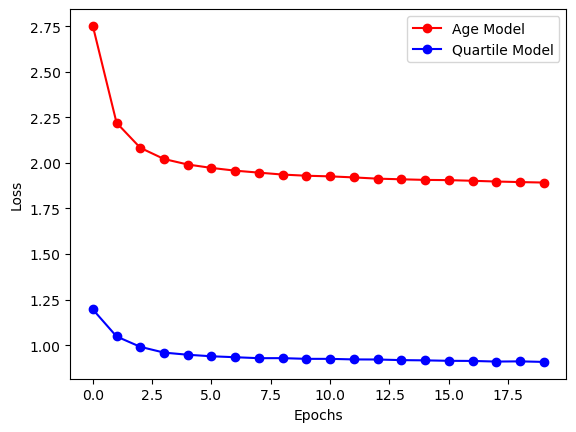

In [41]:
plt.plot(fit_history.history["loss"], "ro-")
plt.plot(fit_q_history.history["loss"], "bo-")
plt.legend(["Age Model", "Quartile Model"])
plt.ylabel("Loss");
plt.xlabel("Epochs");

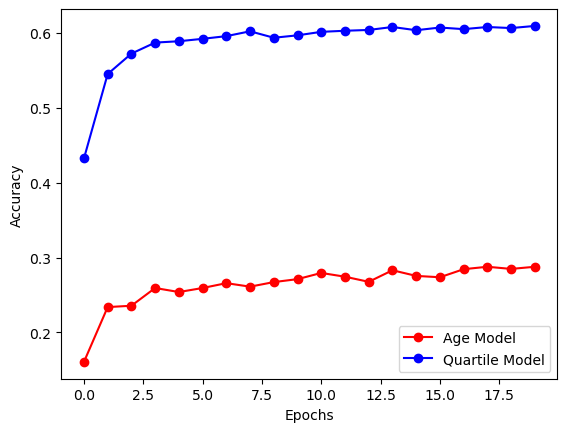

In [42]:
plt.plot(fit_history.history["accuracy"], "ro-")
plt.plot(fit_q_history.history["accuracy"], "bo-")
plt.legend(["Age Model", "Quartile Model"])
plt.ylabel("Accuracy");
plt.xlabel("Epochs");

# Conversione modello TF Lite

In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [44]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Albi\AppData\Local\Temp\tmp5geodlq0\assets


In [45]:
with tf.io.gfile.GFile("model.tflite", "wb") as f:
    f.write(tflite_model)